In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('loan_data.csv')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [8]:
data = data.drop('Loan_ID',axis =1)

In [9]:
for i in data.columns:
    if data[i].dtype=='O':
        print(i,data[i].unique())

Gender ['Male' 'Female' nan]
Married ['Yes' 'No']
Dependents ['1' '0' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Rural' 'Urban' 'Semiurban']
Loan_Status ['N' 'Y']


In [10]:
for i in data.columns:
    print(i,':',data[i].isnull().sum(),data[i].dtype)

Gender : 5 object
Married : 0 object
Dependents : 8 object
Education : 0 object
Self_Employed : 21 object
ApplicantIncome : 0 int64
CoapplicantIncome : 0 float64
LoanAmount : 0 float64
Loan_Amount_Term : 11 float64
Credit_History : 30 float64
Property_Area : 0 object
Loan_Status : 0 object


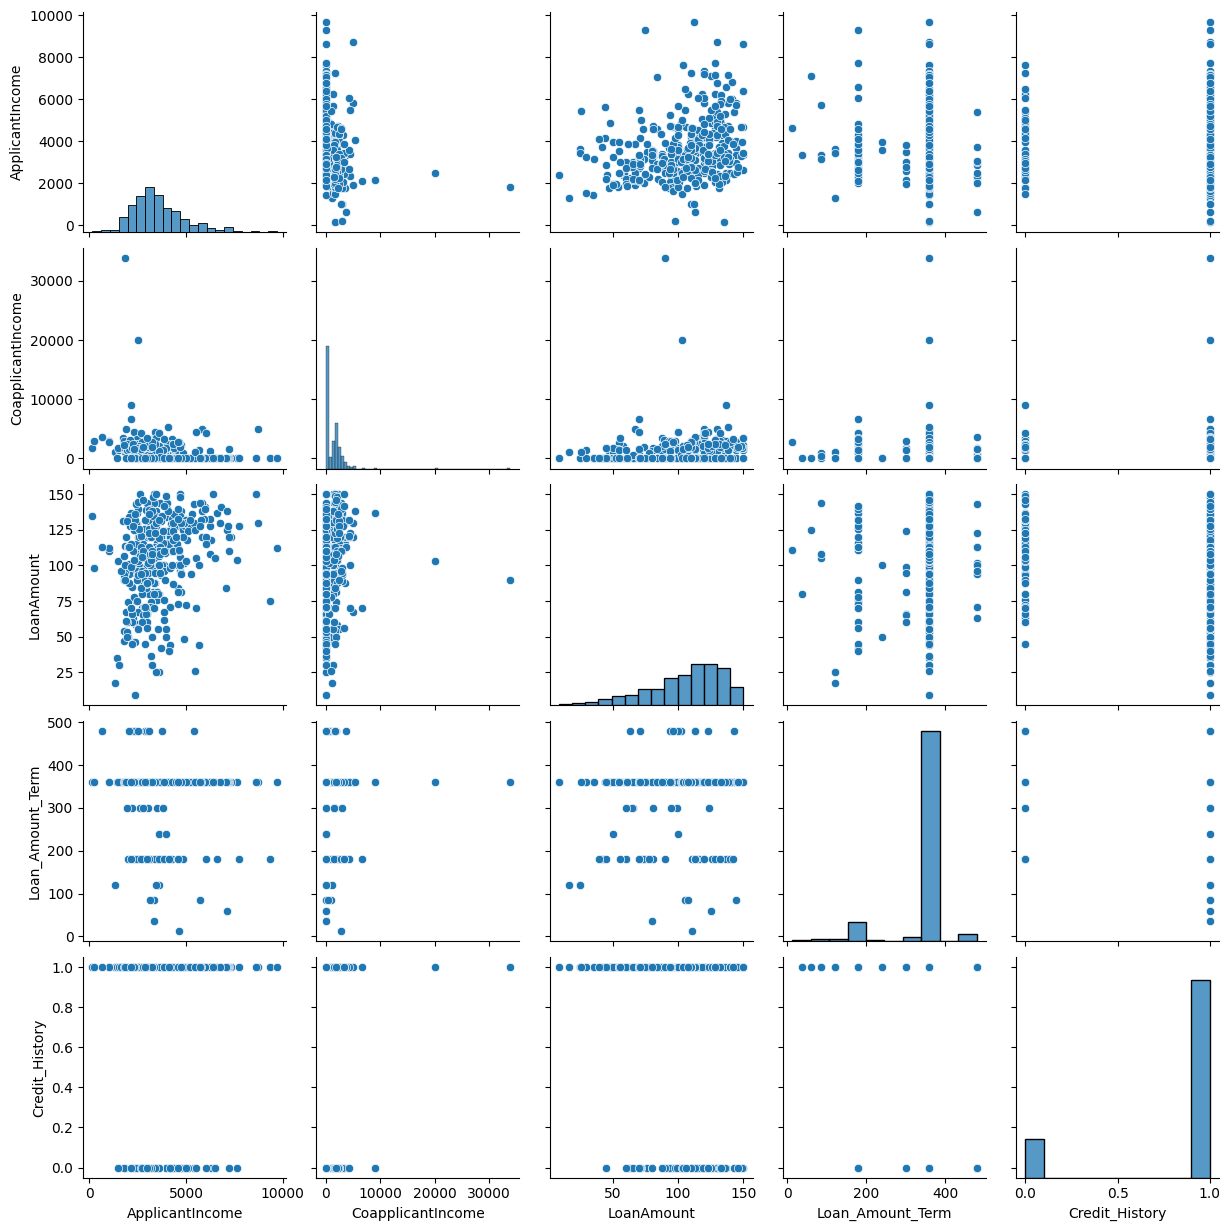

In [11]:
sns.pairplot(data)

In [12]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        if data[i].dtype=='O':
            data[i].fillna(data[i].mode()[0],inplace=True)
        elif data[i].dtype in ['int64','float64']:
            data[i].fillna(data[i].mean(),inplace=True)

In [13]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [15]:
for i in data.columns:
    if data[i].dtype=='O':
        print(i,data[i].unique())
        

Gender ['Male' 'Female']
Married ['Yes' 'No']
Dependents ['1' '0' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Rural' 'Urban' 'Semiurban']
Loan_Status ['N' 'Y']


In [16]:
data['Married'] = data['Married'].map({'No':0,'Yes':1})
data['Dependents'] = data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1})
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2})
data['Loan_Status'] = data['Loan_Status'].map({'N':0,'Y':1})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

In [17]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 35.8 KB


In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.cov(),annot = True, fmt='0.02f', linewidth=3)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
Xtrain,Xtest,ytrain,ytest = train_test_split(data.drop('Loan_Status',axis=1),data['Loan_Status'],test_size=.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [ ]:
data = std.fit_transform(data)

In [ ]:
data

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.head()

In [ ]:
data.columns = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
    'Credit_History', 'Property_Area', 'Loan_Status'
]

In [ ]:
data.head()

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
classifier = DecisionTreeClassifier()

In [23]:
model = classifier.fit(Xtrain,ytrain)

In [24]:
model.score(Xtrain,ytrain)

1.0

In [25]:
model.score(Xtest,ytest)

0.7532467532467533

In [26]:
from sklearn.model_selection import GridSearchCV 

In [51]:
grid = {
    'max_depth':[6,7,8,9,10,5,11],
    'min_samples_split':[10,11,8,9,7,12,15,20,25,30],
    'min_samples_leaf':[6,8,10,12,9]
}

In [52]:
classifier = DecisionTreeClassifier(random_state=42)
gcv = GridSearchCV(estimator=classifier,param_grid = grid) 

In [ ]:
gcv.fit(Xtrain,ytrain)

In [49]:
gcv.score(Xtrain,ytrain)

0.8519736842105263

In [50]:
gcv.score(Xtest,ytest)

0.8051948051948052